In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE, RandomOverSampler
import pickle

In [6]:
data=pd.read_csv(r"C:\Users\raji\Desktop\final project\Code\Final_cleaned_data.csv")

In [4]:
data.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,FLAG_MOBIL,FLAG_CONT_MOBILE,...,AMT_GOODS_PRICE_y,FLAG_LAST_APPL_PER_CONTRACT,NAME_CONTRACT_STATUS,NFLAG_INSURED_ON_APPROVAL,DAYS_BIRTH_YEARS,DAYS_EMPLOYED_YEARS,DAYS_REGISTRATION_YEARS,DAYS_ID_PUBLISH_YEARS,DAYS_LAST_PHONE_CHANGE_YEARS,DAYS_DECISION_YEARS
0,1,Cash loans,M,202500.0,406597.5,24700.5,351000.0,Working,1,1,...,179055.0,Y,Approved,0.0,25.9,1.7,10.0,5.8,3.1,1.7
1,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,1,1,...,900000.0,Y,Approved,1.0,45.9,3.3,3.2,0.8,2.3,2.0
2,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,1,1,...,337500.0,Y,Approved,0.0,45.9,3.3,3.2,0.8,2.3,2.3
3,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,1,1,...,68809.5,Y,Approved,1.0,45.9,3.3,3.2,0.8,2.3,6.4
4,0,Revolving loans,M,67500.0,135000.0,6750.0,135000.0,Working,1,1,...,24282.0,Y,Approved,0.0,52.1,0.6,11.7,6.9,2.2,2.2


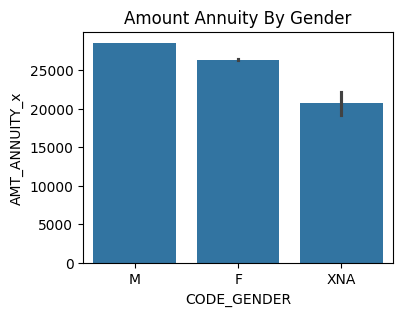

In [5]:
plt.figure(figsize=(4,3))
sns.barplot(x=data["CODE_GENDER"],y=data["AMT_ANNUITY_x"])
Gender=plt.title('Amount Annuity By Gender')



<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Amount Credit By Payment Type')

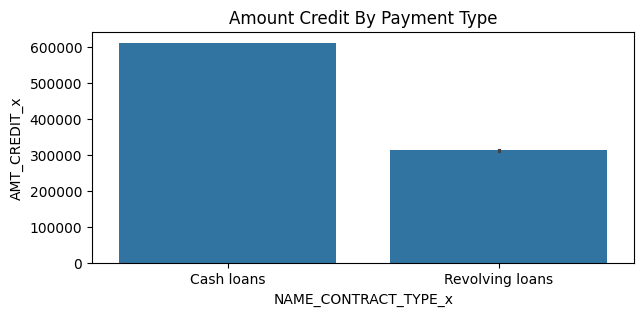

In [6]:
plt.figure(figsize=(7,3))
sns.barplot(x=data["NAME_CONTRACT_TYPE_x"],y=data["AMT_CREDIT_x"])
plt.title('Amount Credit By Payment Type')

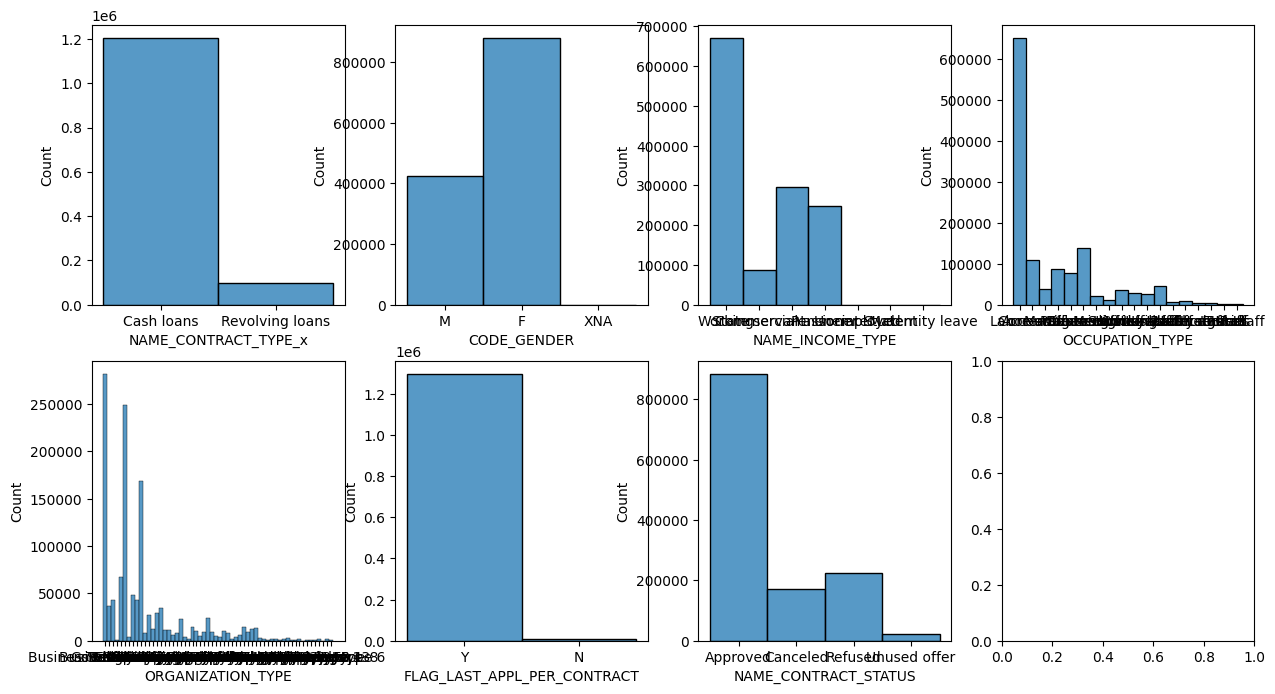

In [7]:
col=data.select_dtypes(include="object")
fig, axes = plt.subplots(2, 4, figsize=(15, 8))  # Adjust figsize as needed
axes = axes.flatten() 

for idx,i in enumerate(col):
  sns.histplot(x=data[i],ax=axes[idx])
    

<Axes: xlabel='DAYS_BIRTH_YEARS'>

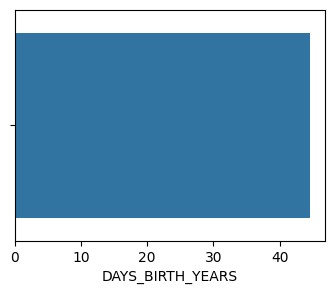

In [9]:
plt.figure(figsize=(4,3))
sns.barplot(x=data["DAYS_BIRTH_YEARS"])


<Axes: xlabel='CODE_GENDER', ylabel='count'>

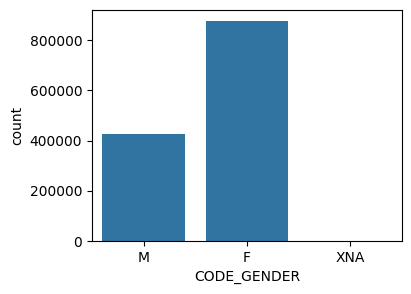

In [10]:
plt.figure(figsize=(4,3))
sns.countplot(x=data["CODE_GENDER"])

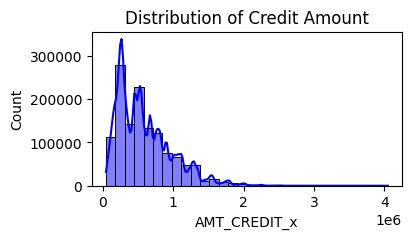

In [13]:
plt.figure(figsize=(4, 2))
sns.histplot(data=data, x='AMT_CREDIT_x', kde=True, bins=30, color='blue')
plt.title('Distribution of Credit Amount')
plt.show()


<Axes: xlabel='AMT_CREDIT_x', ylabel='Count'>

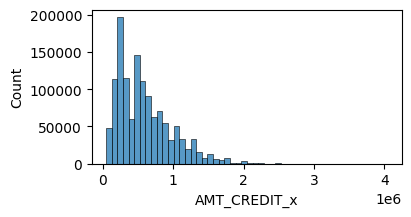

In [18]:
plt.figure(figsize=(4, 2))
sns.histplot(data=data, x='AMT_CREDIT_x',bins=50)

<Axes: xlabel='NAME_CONTRACT_TYPE_x', ylabel='AMT_CREDIT_x'>

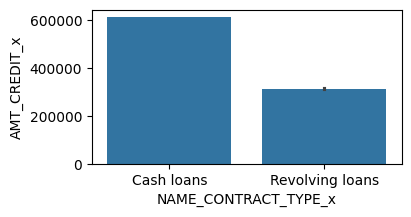

In [9]:
plt.figure(figsize=(4, 2))
sns.barplot(data=data, x='NAME_CONTRACT_TYPE_x', y='AMT_CREDIT_x')

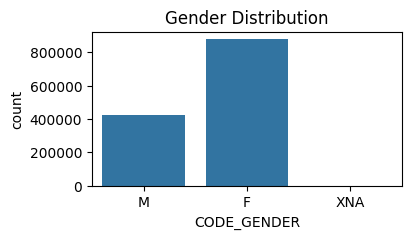

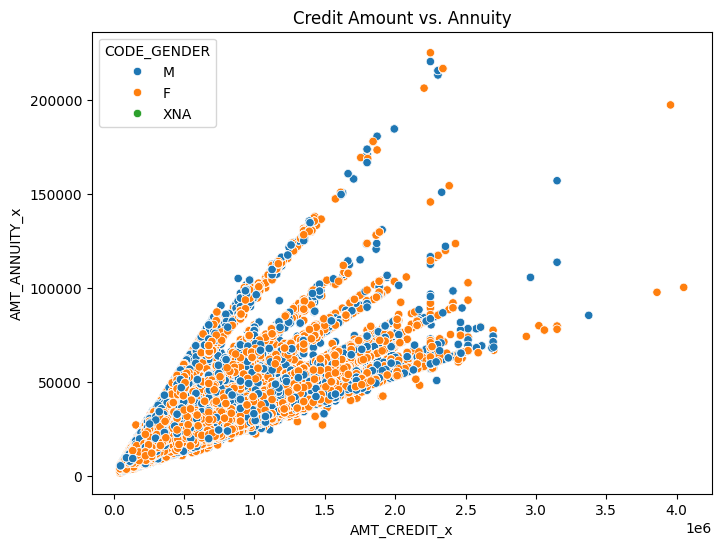

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='AMT_CREDIT_x', y='AMT_ANNUITY_x', hue='CODE_GENDER')
plt.title('Credit Amount vs. Annuity')
plt.show()

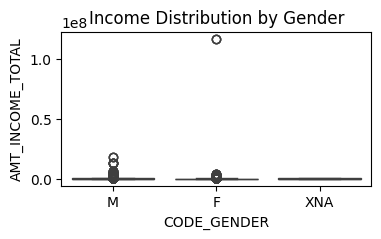

In [15]:
plt.figure(figsize=(4, 2))
sns.boxplot(data=data, x='CODE_GENDER', y='AMT_INCOME_TOTAL')
plt.title('Income Distribution by Gender')
plt.show()